In this tutorial, we will be walking through the implementation details of D2_nn4_quad elements. Here they are visualized in their natural coordinates with 4 nodes and 4 Gaussian integration points (we will get to this later)

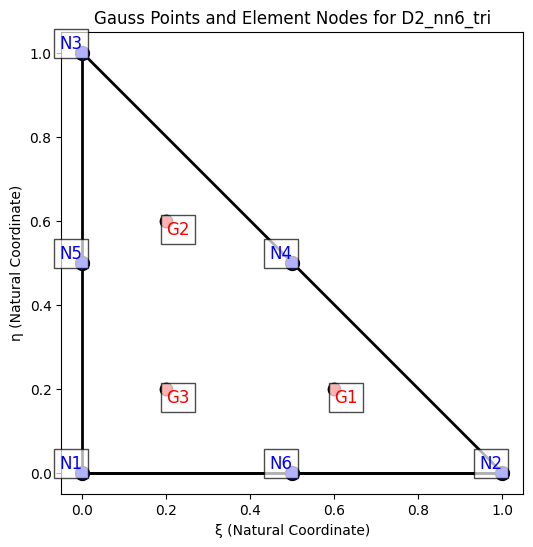

In [5]:
from finiteelementanalysis import discretization_demo_helper_fcns as di_demo

ele_type = "D2_nn6_tri"
num_gauss_pts = 3
fname = "D2_nn6_tri_6gp.png"
di_demo.visualize_gauss_pts(fname, ele_type, num_gauss_pts)

![D2_nn4_gp4_quad](D2_nn4_quad_4gp.png "Bilinear quad element")

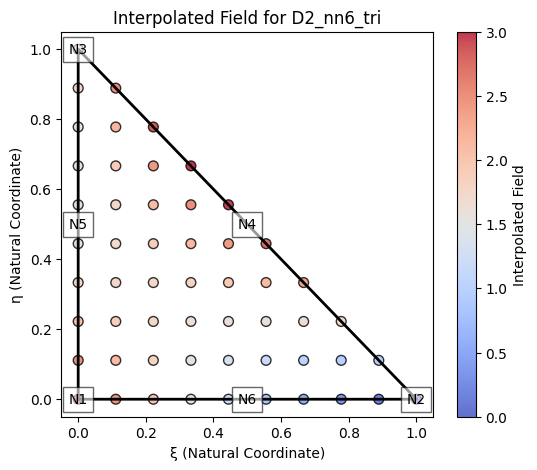

In [7]:
from finiteelementanalysis import discretization_demo_helper_fcns as di_demo
import numpy as np

def fcn(xi, eta):
    return 2.0 * xi + 3.0 * eta + 1.5 * xi * eta

ele_type = "D2_nn6_tri"
node_coords = np.array([[0, 0], [1, 0], [0, 1], [0.5, 0.5], [0, 0.5], [0.5, 0]])
node_values = np.array([fcn(xi, eta) for xi, eta in node_coords])

fname = ele_type + "_interpolate_fcn.png"
di_demo.plot_interpolate_field_natural_coords_single_element(fname, ele_type, node_values)

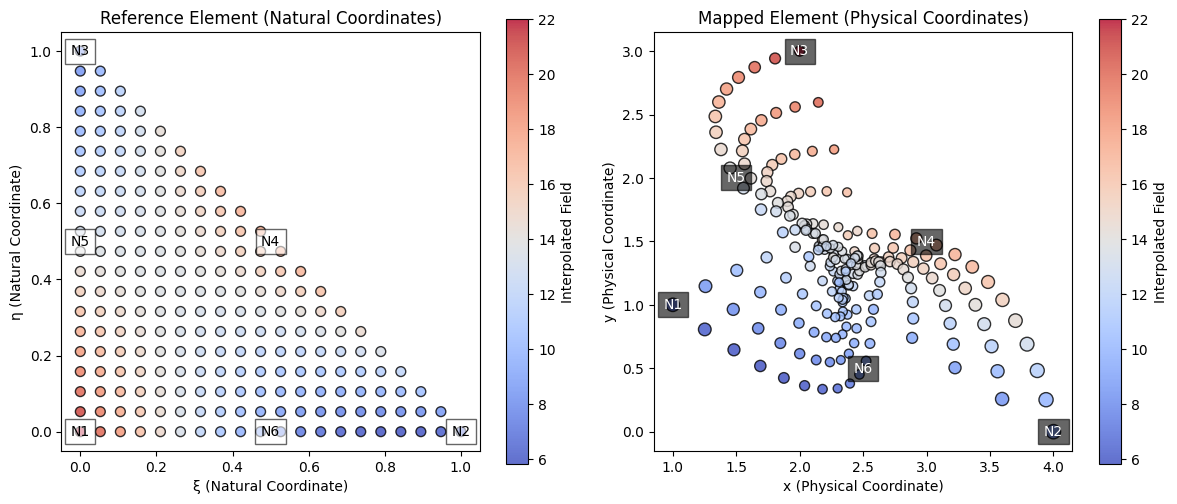

In [13]:
from finiteelementanalysis import discretization_demo_helper_fcns as di_demo
import numpy as np

def fcn(x, y):
    return 2.0 * x + 3.0 * y + 1.5 * x * y

ele_type = "D2_nn6_tri"
node_coords = np.array([[1, 1], [4, 0], [2, 3], [3, 1.5], [1.5, 2], [2.5, 0.5]])
node_values = np.array([fcn(x, y) for x, y in node_coords])
fname = ele_type + "_interpolate_fcn_physical_coords.png"
di_demo.visualize_isoparametric_mapping_single_element(str(fname), ele_type, node_coords, node_values)

In [3]:
from finiteelementanalysis import discretization_demo_helper_fcns as di_demo
import numpy as np

def fcn(x, y):
    return 2.0 * x + 3.0 * y + 1.5 * x * y

def fcn_deriv(x, y):
    return np.asarray([2.0 + 1.5 * y, 3.0 + 1.5 * x]).reshape((2, 1))

ele_type = "D2_nn6_tri"
node_coords = np.array([[0, 0], [2, 0], [0, 2], [1, 1], [0, 1], [1, 0]])
node_values = np.array([fcn(x, y) for x, y in node_coords])

xi, eta = 0.5, 0.5  # element center in natural coordinates

# Map the test point from natural to physical coordinates
x_mapped = di_demo.interpolate_field_natural_coords_single_element(
    ele_type, node_coords[:, 0], [xi], [eta]
).flatten()[0]
y_mapped = di_demo.interpolate_field_natural_coords_single_element(
    ele_type, node_coords[:, 1], [xi], [eta]
).flatten()[0]

# Evaluate the function derivative in physical coordinates
mapped_deriv = fcn_deriv(x_mapped, y_mapped)

# Compute the numerical gradient in natural coordinates
gradient_natural = di_demo.interpolate_gradient_natural_coords_single_element(
    ele_type, node_values, np.array([xi]), np.array([eta])
)

# # Compute Jacobian
# def compute_jacobian(ele_type, node_coords, xi, eta):

#     dN_dxi = np.array([
#         [-3 + 4 * xi + 4 * eta, -3 + 4 * xi + 4 * eta],
#         [4 * xi - 1, 0],
#         [0, 4 * eta - 1],
#         [4 - 8 * xi - 4 * eta, -4 * xi],
#         [4 * eta, 4 * xi],
#         [-4 * eta, 4 - 4 * xi - 8 * eta]
#     ])
#     J = node_coords.T @ dN_dxi
#     return J
# J = compute_jacobian(ele_type, node_coords, xi, eta)
# J_inv = np.linalg.inv(J)
# print("Jacobian matrix (J):", J)
# print("Inverse Jacobian matrix (J_inv):", J_inv)

# Transform the numerical gradient to physical coordinates
# gradient_physical = J_inv.T @ gradient_natural.reshape((2, 1))
# print("gradient_physical (numerical):", gradient_physical)
gradient_physical = di_demo.transform_gradient_to_physical(
    ele_type, node_coords, np.array([xi]), np.array([eta]), gradient_natural
).reshape((2, 1))

if np.allclose(mapped_deriv, gradient_physical, atol=10e-10):
    print("analytical and numerical derivatives match!")
else:
    print("x_mapped:", x_mapped)
    print("y_mapped:", y_mapped)
    print("mapped_deriv:", mapped_deriv)
    print("gradient_natural:", gradient_natural)
    print("gradient_physical:", gradient_physical)
# This part is still not correct


x_mapped: 1.0
y_mapped: 1.0
mapped_deriv: [[3.5]
 [4.5]]
gradient_natural: [[[ 9.]]

 [[13.]]]
gradient_physical: [[2. ]
 [4.5]]


In [12]:
from finiteelementanalysis import discretization_demo_helper_fcns as di_demo
import numpy as np

def fcn(x, y):
    return 3.0 * x + 10.0 * y

def fcn_deriv(x, y):
    return np.asarray([3.0, 10.0])  # df/dx = 3.0, df/dy = 0

def element_area(node_coords):
    x1, y1 = node_coords[0]
    x2, y2 = node_coords[1]
    x3, y3 = node_coords[2]
    x4, y4 = node_coords[3]
    x5, y5 = node_coords[4]
    x6, y6 = node_coords[5]

    area = 0.5 * abs((x1 * y2 + x2 * y3 + x3 * y4 + x4 * y5 + x5 * y6 + x6 * y1) 
                     - (y1 * x2 + y2 * x3 + y3 * x4 + y4 * x5 + y5 * x6 + y6 * x1))
    return area

def integral_of_deriv(node_coords):
    area = element_area(node_coords)
    return np.array([3.0 * area, 10.0 * area]).reshape((2, 1))

ele_type = "D2_nn6_tri"
num_gauss_pts = 3
node_coords = np.array([[0, 0], [2, 0], [0, 2], [1, 1], [0, 1], [1, 0]])

# Compute nodal values from fcn(x, y)
nodal_values = np.array([[fcn(x, y) for x, y in node_coords]]).T

# Compute numerical integral
integral_numerical = di_demo.compute_integral_of_derivative(
    ele_type, num_gauss_pts, node_coords, nodal_values)

# Compute analytical integral
integral_analytical = integral_of_deriv(node_coords) * -1

# check result
if np.allclose(integral_numerical, integral_analytical, atol=10e-1):
    print("analytical and numerical integrals of derivatives match!")
else:
    print("integral_numerical:", integral_numerical)
    print("integral_analytical:", integral_analytical)

analytical and numerical integrals of derivatives match!
